In [ ]:
# imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn import metrics

In [ ]:
# load dataset
data = pd.read_csv('/content/Student_Performance.csv')
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
# data preprocessing
print(data.isna().sum())
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [ ]:
# assign features to X and target column to y
X = data.drop('Performance Index', axis=1)
y = data['Performance Index']

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# impute null values into mean values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Extracurricular Activities']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['Extracurricular Activities']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [ ]:
# train model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_imputed)

<ipython-input-19-f5dcc752ebe8>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Regression Line')  # Regression line (y = x line)


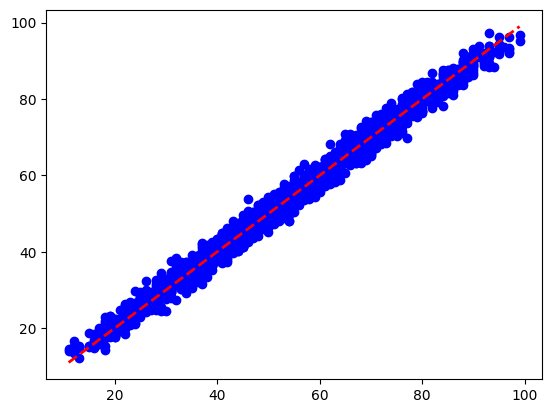

In [ ]:
# Create a scatter plot and a regression line
plt.scatter(y_test, y_pred, color='blue', label='Scatter Plot')  # Actual vs Predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='r', label='Regression Line')  # Regression line (y = x line)

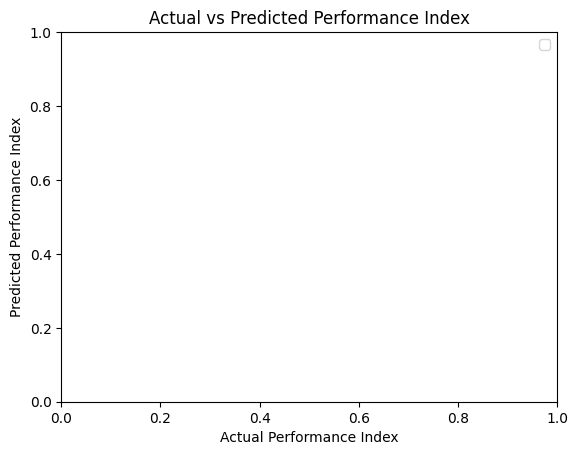

In [ ]:
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs Predicted Performance Index')
plt.legend()
plt.show()